# Predicting ratings on Sephora based on price and number of ingredients

Author: Nicole Sonneville

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course's website. Yes


**Introduction**

In this project, I will be trying to find a relationship between a product's ratings and its price and/or number of ingredients. This data set tracks a product's reviews in two ways: rating and loves. Rating is your standard 5 star scale where customers can choose to rate a product 5 stars, 4.5 stars, 4 stars, etc all the way down to 0 stars. Loves are the number of people who heart the product; this saves the product to their favorites for easier repurchase later. 

I think its important to recognize the different reasonings someone may leave a rating versus hitting love on a product. People tend to leave ratings for one of two reasons: either they extremely hate the product and want to cathartically express their distaste online, or a brand offers some sort of coupon on their next order for leaving a good rating. Because of this, I expect ratings to be very extreme. There will be many 4-5 star reviews and quite a few 0-1 star reviews, but very minimal 2-3 star reviews. Loves, on the other hand, are not made public and are strictly for ease of repurchase. Because of this, I would think that cheaper products may tend to have more loves as they may be more frequently repurchased than expensive products.

**Imports:**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv("sephora_website_dataset.csv")

**Data cleaning:**

In [64]:
df_1 = df.drop(['details', 'how_to_use', 'URL', 'MarketingFlags_content'], axis=1)
df = df_1.sample(n=1000, random_state=42)

This was a large data set I found from kaggle (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset), so I dropped columns I didn't find useful. Also, since the data set was so large, I choose 1000 random rows to analyze as to not be overwhelmed

In [65]:
print(df['ingredients'].head())

1501    Sucrose- Morrocan Lava Clay- Ammonium Lauryl S...
4708    Algae (Seaweed) Extract- Cyclopentasiloxane- P...
7859                                              unknown
4347     -Squalane: Helps restore skin’s natural moist...
2420     -Hyaluronic Chronospheres: Provide time-relea...
Name: ingredients, dtype: object


I wanted to analyze the number of ingredients, but I realized that the ingredients column had all ingredients in a big string

In [66]:
# Function to count the number of ingredients
def count_ingredients(ingredient_list):
    if ingredient_list.lower() == 'unknown':
        return np.nan
    return len(ingredient_list.split('-'))

# Apply the function to create the num_ingredients column
df['num_ingredients'] = df['ingredients'].apply(count_ingredients)

print(f"Sampled DataFrame size: {df.shape}")
df.sample(10)

Sampled DataFrame size: (1000, 18)


,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,MarketingFlags,options,ingredients,online_only,exclusive,limited_edition,limited_time_offer,num_ingredients
1393,2115558,Charlotte Tilbury,Eyeliner,Rock 'N' Kohl Eyeliner Pencil,.04 oz,4.0,85,16800,27.00,27.00,False,no options,Isododecane- Synthetic Wax- Hydrogenated Polyd...,0,0,0,0,28.0
2982,2148971,FOREO,Face Masks,Glow Addict Activated Mask,6 masks,4.5,6,2400,19.99,19.99,False,no options,Water- Glycerin- Butylene Glycol- Dipropylene...,0,0,0,0,39.0
8974,2086981,SEPHORA COLLECTION,Face Masks,Acai Smoothie Mask - Anti-Pollution,1.69oz/ 50 mL,5.0,16,2200,8.00,8.00,True,no options,-Açaí Berry Extract: Acts like a shield again...,0,1,0,0,44.0
5623,2030351,Moroccanoil,Shampoo,Moisture Repair Shampoo,no size,4.5,912,12600,24.00,24.00,False,no options,-Argan Oil: Helps to nurture hair. -Lavender- ...,0,0,0,0,72.0
5111,2346328,Living Proof,Value & Gift Sets,Full Silicone Detox Kit,no size,0.0,0,75,29.00,60.00,True,no options,-Healthy Hair Molecule: Keeps hair cleaner lo...,1,0,1,0,144.0
6552,2283349,philosophy,Moisturizers,Renewed Hope in A Jar Water Cream,2 oz/ 60 mL,4.5,135,1800,39.00,39.00,False,no options,Aqua/Water/Eau- Glycerin- Pentylene Glycol- Is...,0,0,0,0,40.0
6997,2295814,Sakara Life,Beauty Supplements,Sakara Life Super Powder,no size,4.5,12,884,90.00,135.00,True,no options,-Plant Protein Blend: Derived from four organ...,1,0,0,0,29.0
2516,2313005,Drunk Elephant,Face Masks,F-Balm™ Electrolyte Waterfacial Mask,1.69 oz/ 50 mL,4.0,797,38700,52.00,52.00,True,no options,-4-Electrolyte Blend: Antioxidant-rich and po...,0,1,0,0,131.0
6001,2174050,NEST New York,Candles & Home Scents,Velvet Pear Candle,8.1oz/230g,5.0,1,303,42.00,42.00,False,- 8.1oz/230g Candle - 21.1oz/ 600g Candle ...,unknown,0,0,0,0,NaN
8084,2339760,Tatcha,Value & Gift Sets,The Japanese Ritual for Glowing Skin,no size,5.0,8,16100,60.00,75.00,True,no options,-Tatcha's Signature Hadasei-3: Restores a hea...,1,1,1,0,141.0


I created a helper function to separate the ingredients by the "-" character and to register "unknown" as NaN. With these separated ingredients, I created a new column "num_ingredients" to keep track of how many ingredients there were in each product. Here are 10 rows showing the new num_ingredients column.

**Exploratory Data Analysis:**

count    819.000000
mean      47.882784
std       36.664186
min        1.000000
25%       23.000000
50%       38.000000
75%       62.000000
max      354.000000
Name: num_ingredients, dtype: float64
Number of missing values in 'num_ingredients': 181


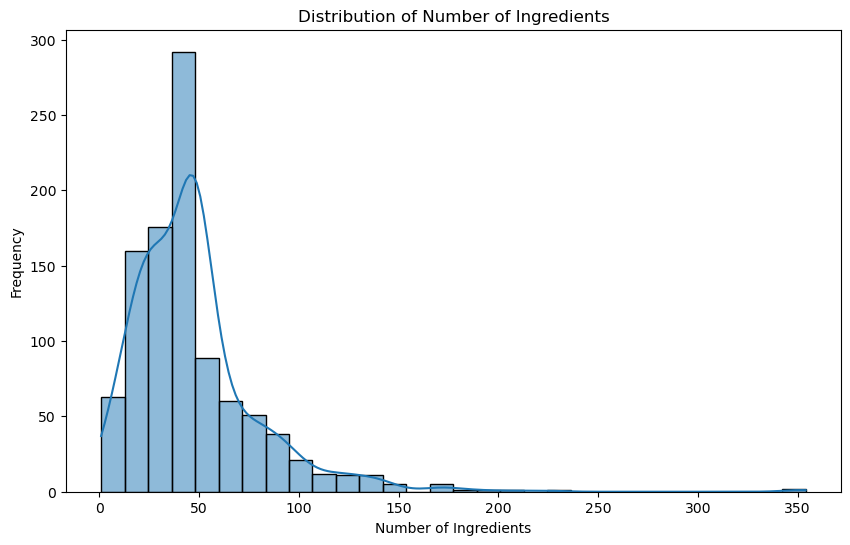

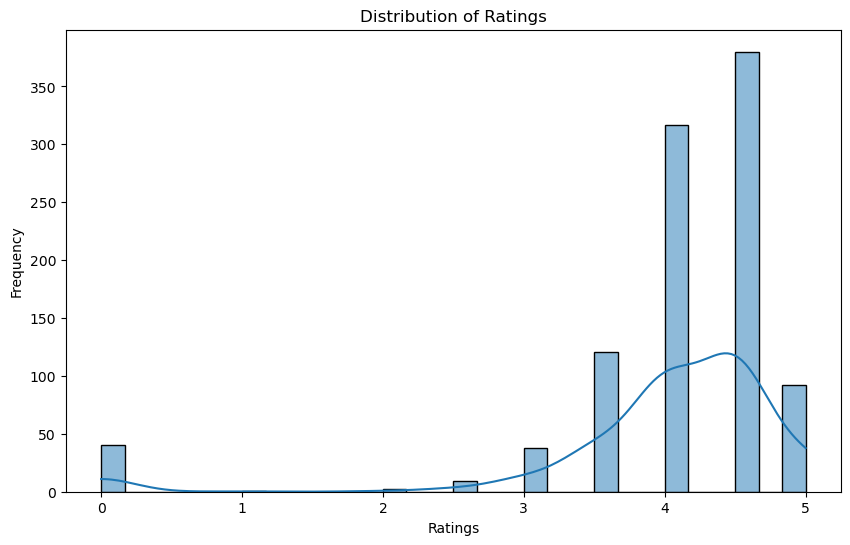

In [67]:
# Basic statistics about the number of ingredients
print(df['num_ingredients'].describe())
print(f"Number of missing values in 'num_ingredients': {df['num_ingredients'].isna().sum()}")

# Replace missing values with the mean or drop rows with missing values for numerical analysis
df['num_ingredients'].fillna(df['num_ingredients'].mean(), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['num_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

First I created a historgram of the frequency of the number of ingredients in the products. Overall, the mean tended to be around 50 products, with some going up as high as the 350s. I was shocked that the mean was this high, and even more shocked to see that several products have 100s of ingredients.

I also wanted to check the distribution of ratings to see if it fit with my hypothesis from earlier. Sure enough, there is a majority of 4-5 star reviews and very limited 1-3 star ratings.

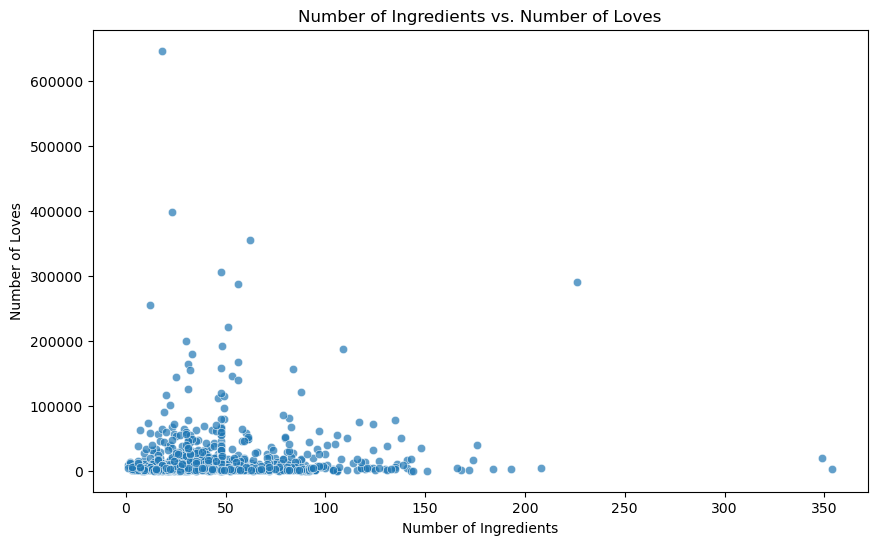

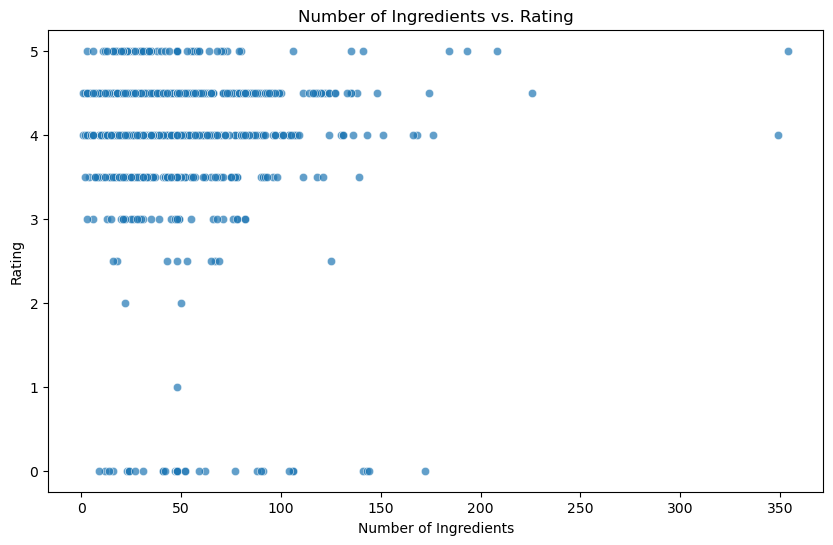

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_ingredients', y='love', alpha=0.7)
plt.title('Number of Ingredients vs. Number of Loves')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Loves')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_ingredients', y='rating', alpha=0.7)
plt.title('Number of Ingredients vs. Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.show()

Now I wanted to see the distribution of the number of ingredients with loves and ratings. There doesn't seem to be a noticeable relationship. The higher ratings (4's and 5's) had a larger spread of how many ingredients they had, whereas the mediocre and bad ratings tended to have a smaller range in number of ingredients.

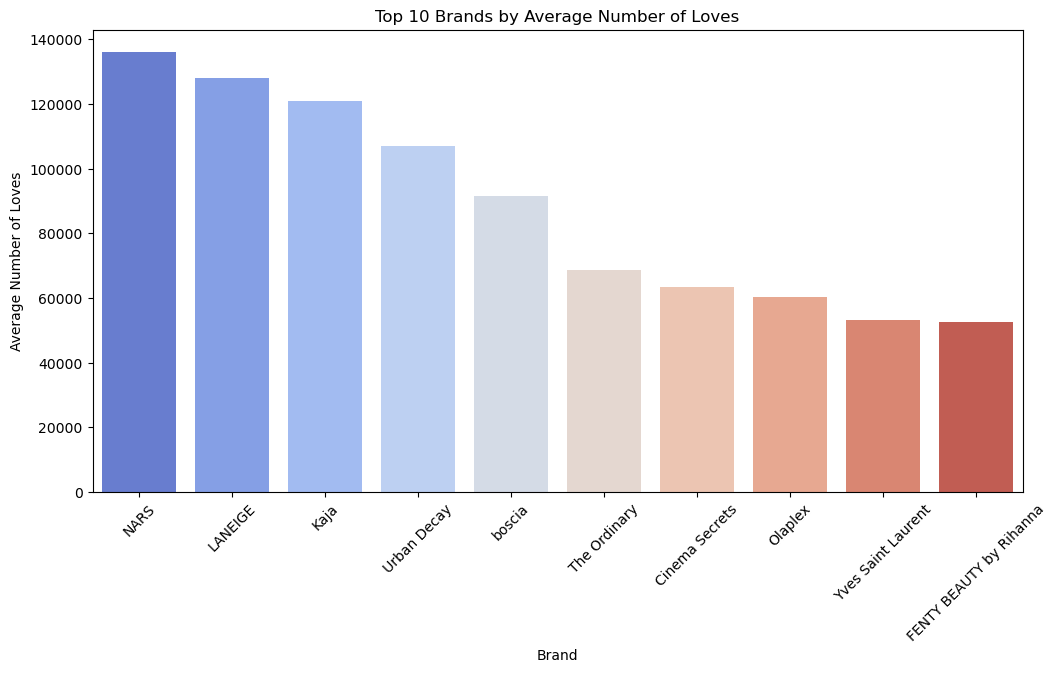

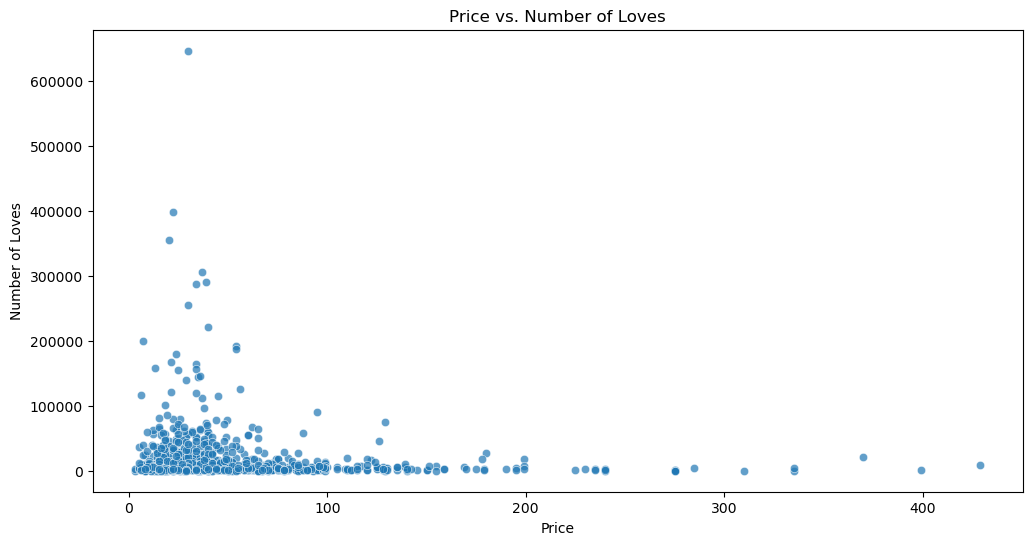

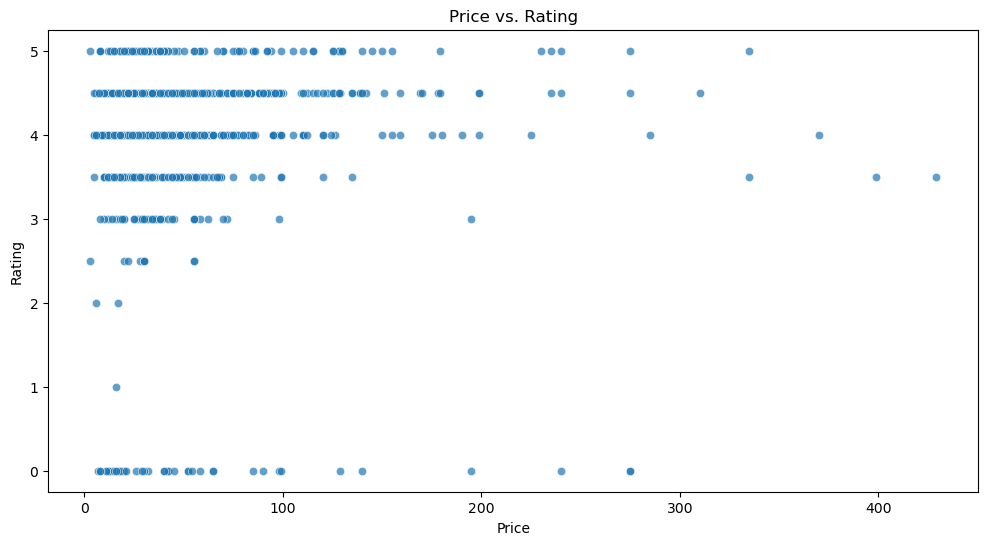

In [69]:
# Group by brand and calculate the average rating and love count
brand_stats = df.groupby('brand').agg({
    'rating': 'mean',
    'love': 'mean',
    'num_ingredients': 'mean'
}).reset_index()

top_brands_love = brand_stats.sort_values(by='love', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='love', data=top_brands_love, palette='coolwarm')
plt.title('Top 10 Brands by Average Number of Loves')
plt.xlabel('Brand')
plt.ylabel('Average Number of Loves')
plt.xticks(rotation=45)
plt.show()

# Relationship between price and loves
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='love', alpha=0.7)
plt.title('Price vs. Number of Loves')
plt.xlabel('Price')
plt.ylabel('Number of Loves')
plt.show()

# Relationship between price and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='rating', alpha=0.7)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Now I did a similar analysis between price and loves/ratings. Similar to with number of ingredients, the higher ratings had a much larger spread in prices. The lower ratings tended to be on less expensive products, but this relationship is not very strong.

**Linear Regression:**

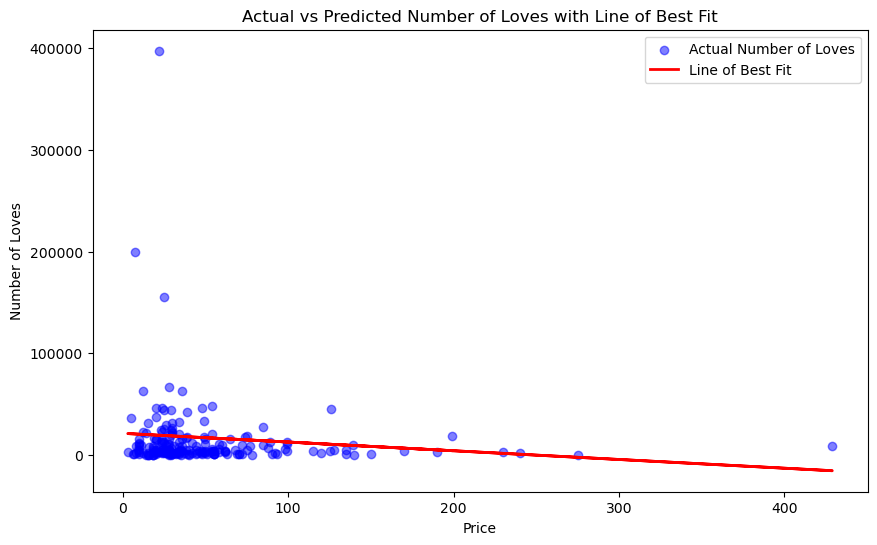

R² Score: 0.0009509966720172569


In [70]:
X = df[['price']]  
y = df['love']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Number of Loves')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('Price')
plt.ylabel('Number of Loves')
plt.title('Actual vs Predicted Number of Loves with Line of Best Fit')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Now I performed linear regression between number of loves and price. There is a slight negative correlation between loves and price, however not a strong relationship.

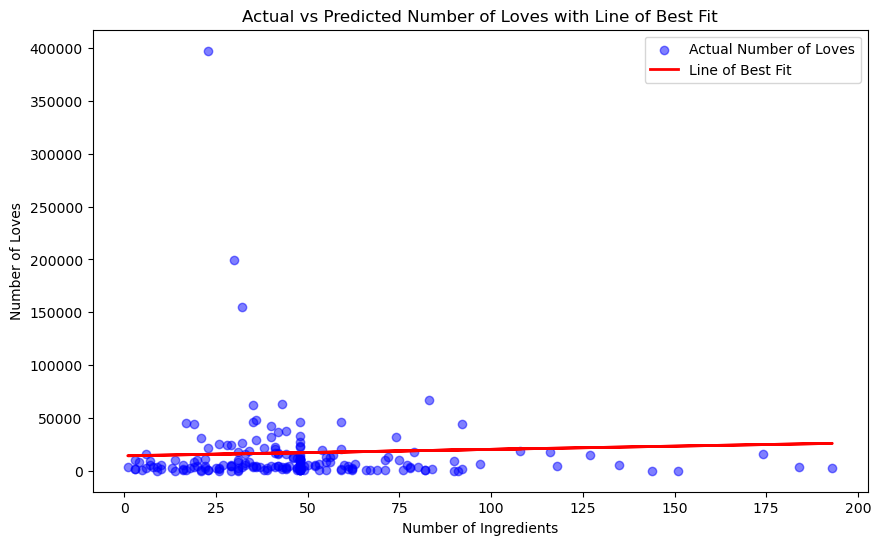

R² Score: -0.021064954183508178


In [71]:
X = df[['num_ingredients']]
y = df['love']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Number of Loves')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Loves')
plt.title('Actual vs Predicted Number of Loves with Line of Best Fit')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

I also did linear regression on loves and number of ingredients. This time, there was a slight positive correlation between the two, but not strong. 

**K-Nearest Neighbors:**

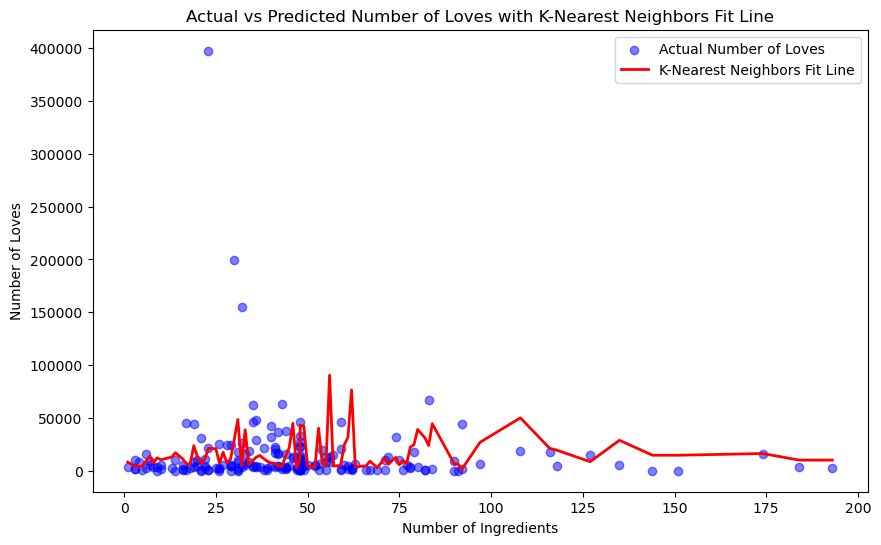

R² Score: -0.23177714981810005


In [72]:
X = df[['num_ingredients']]
y = df['love']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.values.flatten(), y_pred)))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Number of Loves')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='K-Nearest Neighbors Fit Line')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Loves')
plt.title('Actual vs Predicted Number of Loves with K-Nearest Neighbors Fit Line')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

I performed k nearest neighbors with number of ingredients and loves. I choose n_neighbors = 5 to avoid overfitting the data, as a lower value of k tends to do so. This means the fit line is determined by looking at the average of its 5 closest neighbors.

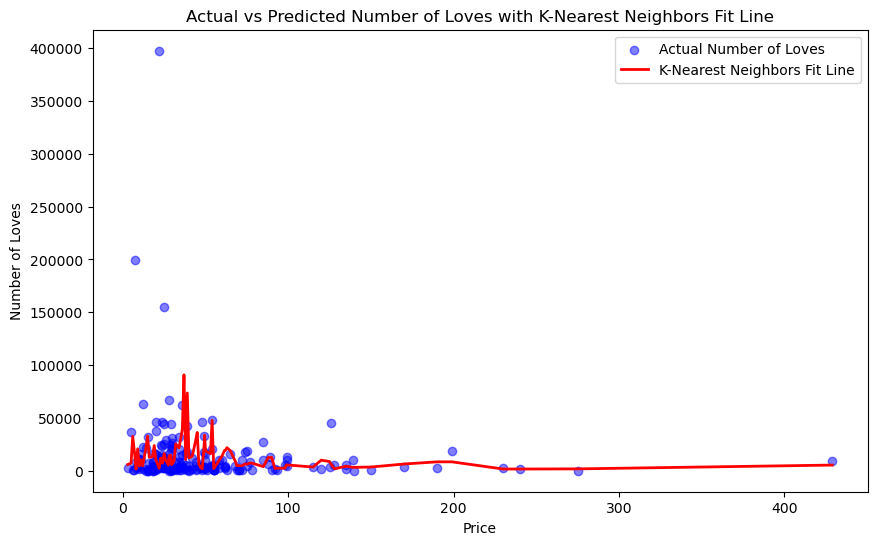

R² Score: -0.1738229878440276


In [73]:
X = df[['price']]
y = df['love']  # Target: Number of Loves

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.values.flatten(), y_pred)))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Number of Loves')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='K-Nearest Neighbors Fit Line')
plt.xlabel('Price')
plt.ylabel('Number of Loves')
plt.title('Actual vs Predicted Number of Loves with K-Nearest Neighbors Fit Line')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Similarly I performed k-nearest neighbors on price and number of loves. 

**Extra: Decision Tree Regression**

I learned about another tool that could be used to analyze the data: decision tree regression (https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/). 

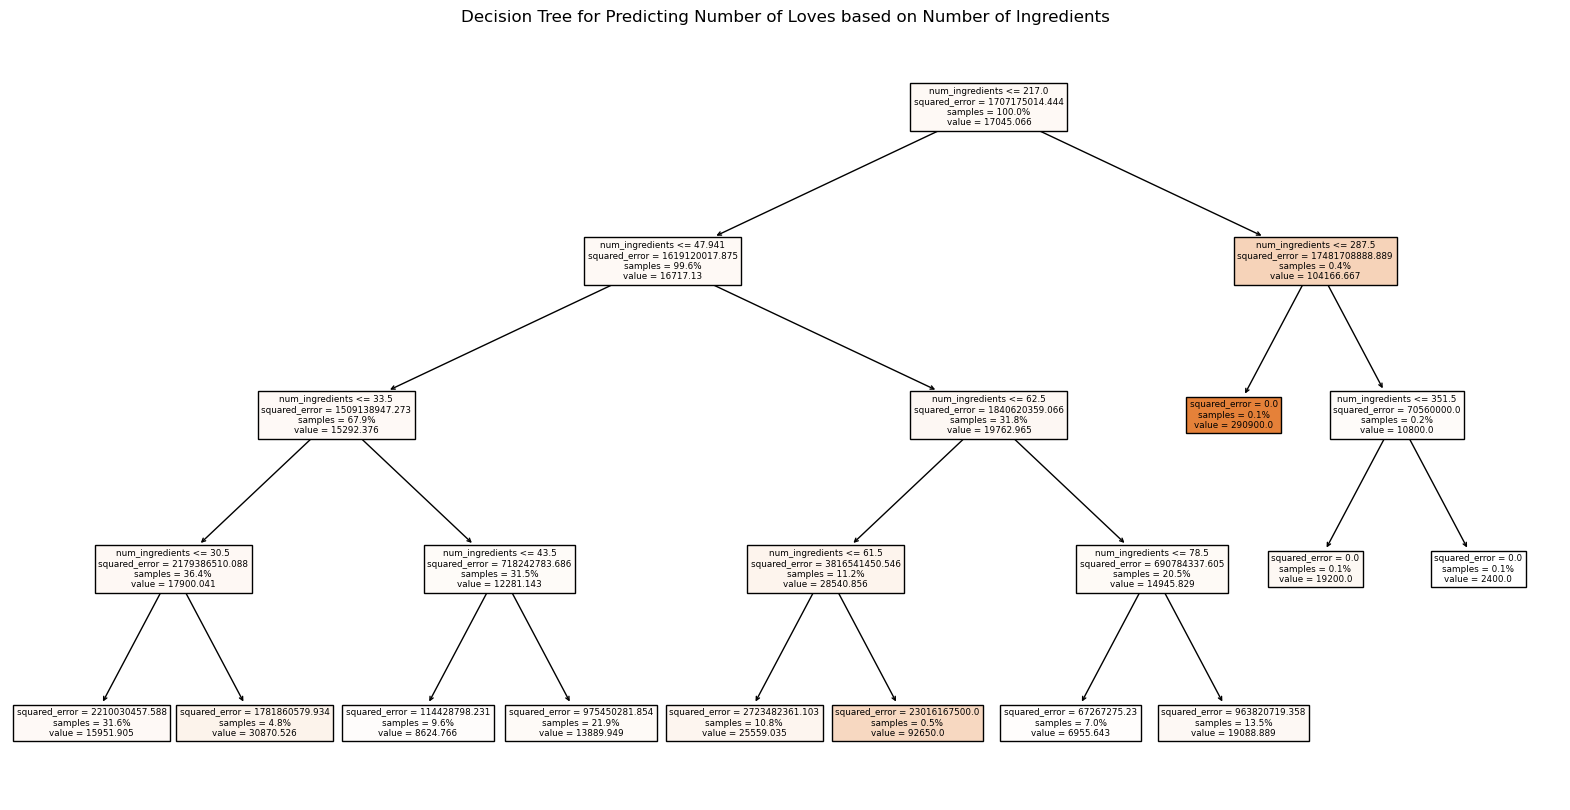

R² Score: -0.14020743893570753


In [74]:
X = df[['num_ingredients']] 
y = df['love']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=['num_ingredients'], proportion=True)
plt.title('Decision Tree for Predicting Number of Loves based on Number of Ingredients')
plt.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")

Here, I choose a tree depth of 4 to avoid overfitting the data. 

**In Conclusion:**

Despite the use of many tools such as linear regression, k nearest neighbors, and decision tree regression, all of these models failed to be an accurate depiction of the relationship between loves and number of ingredients or price. The vast majority of the models resulted in a negative R^2 value, which means they did horribly on predicting number of loved based on ingredients or price. The only model with some promise was the linear regression on price and loves, suggesting lower priced products result in more loves.

**Future Research:**

This analysis just scratches the surface of predicting makeup sales. I think it would be interesting to take a look at celebrity make up brands specifically, as their marketing is completely different from other brands. Not only are ratings about the products but also how the celebrity is perceived and marketed. It would also be interesting to look at how marketing tactics such as "limited time" have an effect on ratings. 